In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
school_df = pd.read_csv("data_sources/nces330_20.csv")
school_df = school_df.dropna()
school_df = school_df.rename(columns={"Value": "Cost"})
school_df.head()

,Year,State,Type,Length,Expense,Cost
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473


In [13]:
school_private = school_df[school_df["Type"] == "Private"].groupby(["State"]).max()
school_private = school_private.sort_values(by="Cost")
school_private = school_private[school_private["Year"] == 2021]
del school_private["Year"]
school_private

,Type,Length,Expense,Cost
State,,,,
Utah,Private,4-year,Room/Board,8158
Idaho,Private,4-year,Room/Board,8728
West Virginia,Private,4-year,Room/Board,12673
Arizona,Private,4-year,Room/Board,13487
Delaware,Private,4-year,Room/Board,15096
North Dakota,Private,4-year,Room/Board,16408
Alabama,Private,4-year,Room/Board,17354
Hawaii,Private,4-year,Room/Board,19096
Mississippi,Private,4-year,Room/Board,19222


In [14]:
school_fouryear = school_df[school_df["Length"] == "4-year"].groupby(["State"]).max()
school_fouryear = school_fouryear.sort_values(by="Cost")
school_fouryear = school_fouryear[school_fouryear["Year"] == 2021]
del school_fouryear["Year"]
school_fouryear

,Type,Length,Expense,Cost
State,,,,
Wyoming,Public Out-of-State,4-year,Room/Board,18021
North Dakota,Public Out-of-State,4-year,Room/Board,19021
Mississippi,Public Out-of-State,4-year,Room/Board,20160
Utah,Public Out-of-State,4-year,Room/Board,21595
West Virginia,Public Out-of-State,4-year,Room/Board,22475
Idaho,Public Out-of-State,4-year,Room/Board,24845
Arkansas,Public Out-of-State,4-year,Room/Board,24998
Nebraska,Public Out-of-State,4-year,Room/Board,25313
Kansas,Public Out-of-State,4-year,Room/Board,25523


In [15]:
school_twoyear = school_df[school_df["Length"] == "2-year"].groupby(["State"]).max()
school_twoyear = school_twoyear.sort_values(by="Cost")
school_twoyear = school_twoyear[school_twoyear["Year"] == 2021]
del school_twoyear["Year"]
school_twoyear

,Type,Length,Expense,Cost
State,,,,
Nebraska,Public Out-of-State,2-year,Fees/Tuition,4101
Kansas,Public Out-of-State,2-year,Fees/Tuition,4828
Arkansas,Public Out-of-State,2-year,Fees/Tuition,4905
Mississippi,Public Out-of-State,2-year,Fees/Tuition,5835
Minnesota,Public Out-of-State,2-year,Fees/Tuition,6203
New Mexico,Public Out-of-State,2-year,Fees/Tuition,6698
Maine,Public Out-of-State,2-year,Fees/Tuition,6746
Missouri,Public Out-of-State,2-year,Fees/Tuition,6797
Iowa,Public Out-of-State,2-year,Fees/Tuition,6844


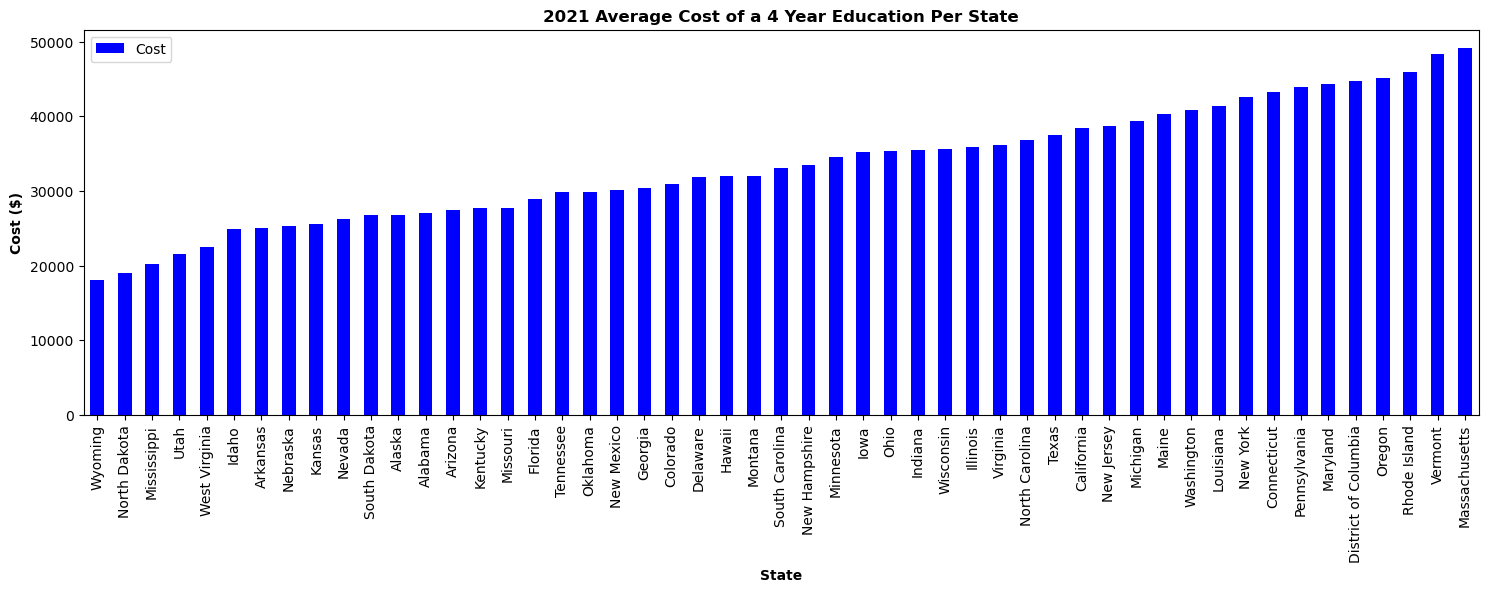

In [46]:
school_fouryear.plot.bar(figsize = (18,5), color="blue")
plt.title("2021 Average Cost of a 4 Year Education Per State", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.show()

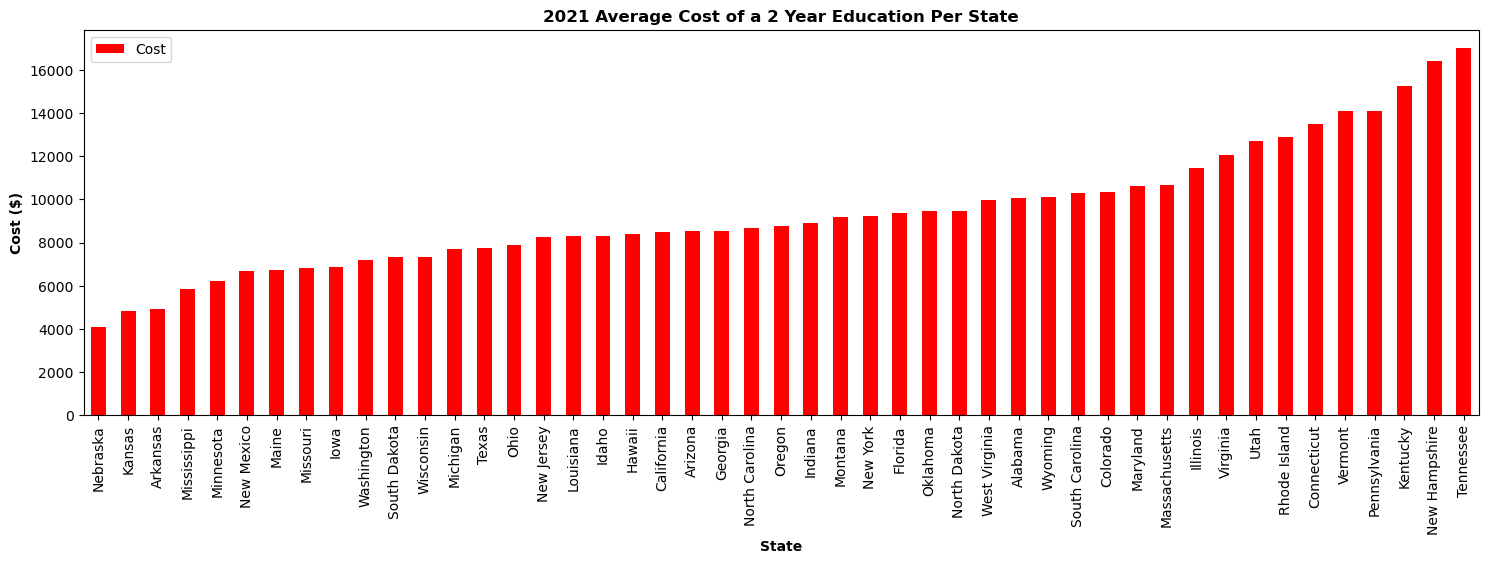

In [45]:
school_twoyear.plot.bar(figsize = (18,5), color="red")
plt.title("2021 Average Cost of a 2 Year Education Per State", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.show()

In [21]:
combined_for_plot = pd.merge(school_fouryear, school_twoyear, on="State")
combined_for_plot = combined_for_plot.rename(columns={"Cost_x": "4 Year Cost", "Cost_y": "2 Year Cost"})

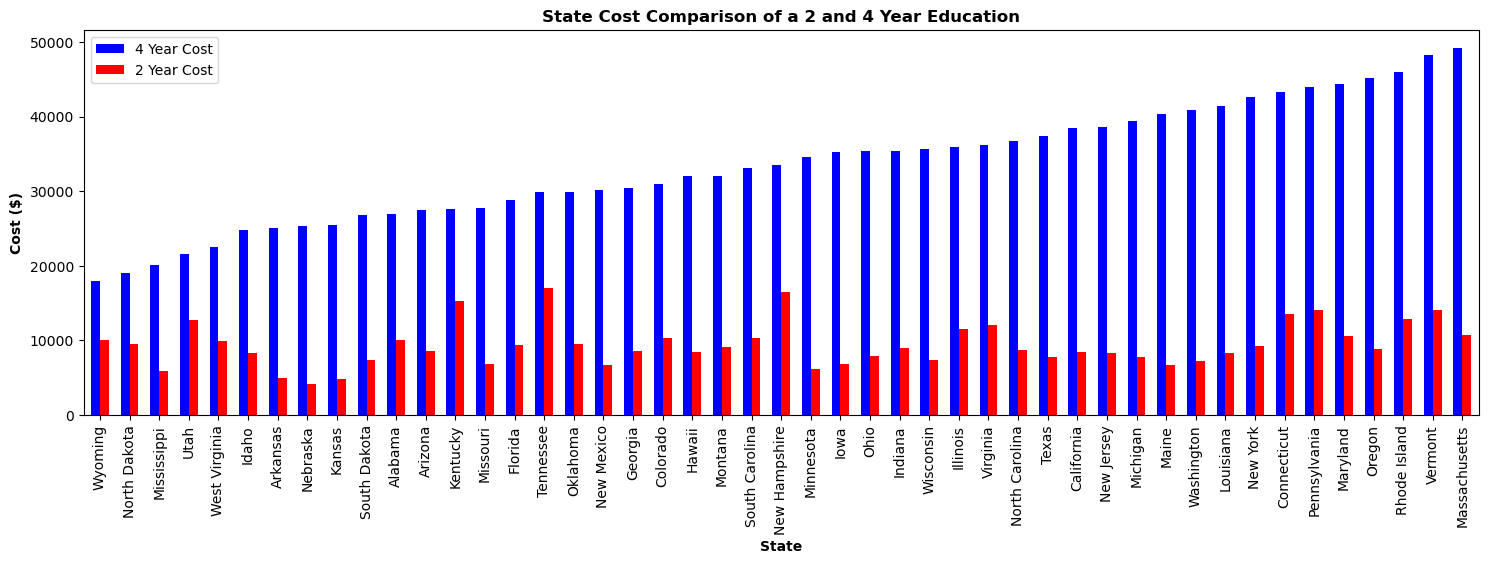

In [47]:
combined_for_plot.plot.bar(figsize = (18, 5), color=["blue", "red"], width = 0.6)
plt.title("2021 State Cost Comparison of a 2 and 4 Year Education", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.show()

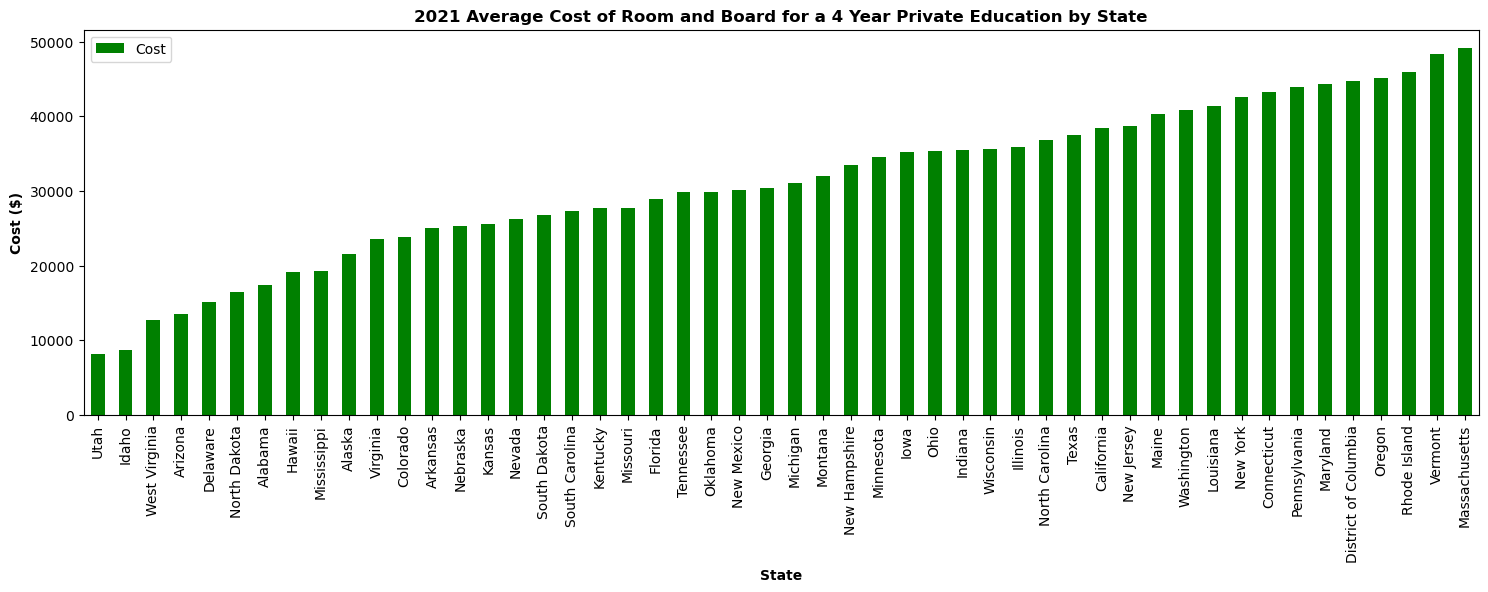

In [15]:
school_private.plot.bar(figsize = (18,5), color="green")
plt.title("2021 Average Cost of Room and Board for a 4 Year Private Education by State", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.show()